# * 라이브러리 불러오기

In [8]:
#필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import re
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 확인

### 칼럼 설명

- **Name**: 자동차 브랜드와 모델명
- **Location**: 자동차를 판매하는 위치
- **Year**: 자동차 모델 연도
- **Kilometers_Driven**: 이전 소유자가 사용한 주행거리 (단위: KM)
- **Fuel_Type**: 자동차에서 사용하는 연료 유형
  - 가솔린, 디젤, 전기, CNG, LPG
  - **CNG**: 가정 및 공장 등에서 사용하는 도시가스를 약 200기압으로 압축한 연료
  - **LPG**: 석유성분 중 끓는점이 낮은 가스를 상온에서 압력을 가하여 액화한 연료
- **Transmission**: 변속기 유형
  - Automatic: 자동
  - Manual: 수동
- **Owner_Type**: 소유권 유형 (First, Second, Third, Fourth & Above)
- **Mileage**: 자동차 회사에서 제공하는 표준 마일리지(연비)
- **Engine**: 엔진 배기량 (단위: cc)
- **Power**: 엔진 최대 출력 (단위: bhp, 제동마력 - 실제로 엔진이 돌아가는 힘)
- **Seats**: 자동차 좌석수
- **New_Price**: 해당 모델 새차 가격
- **Price**: 중고차 가격 (인도화폐 루피, Lakh(라크): 100,000루피)
크) : 100,000루피) 

In [2]:
#데이터 불러오기
df = pd.read_csv("Car.csv", encoding='euc-kr')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
#각 칼럼의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
#df의 형태 확인
df.shape

(7253, 13)

In [5]:
#수치형 값 칼럼 통계값, top, freq, unique 확인
df.describe(include='all')

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
count,7253,7253,6200.000000,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006
unique,2041,11,NaN,NaN,NaN,5,2,4,438,150,386,NaN,625
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh
freq,55,949,NaN,NaN,NaN,3852,5204,5952,208,732,280,NaN,6
mean,NaN,NaN,14912.514750,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN
std,NaN,NaN,17674.318464,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN
min,NaN,NaN,7.080000,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,5365.360000,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
50%,NaN,NaN,8814.520000,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,15869.972500,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN


# 2. 데이터 전처리

## 2.1 결측치 처리

#### **# 결측치 확인 및 Name을 이용한 결측치 보간(Price 제외)**

In [6]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [7]:
df['New_Price'] = df.groupby('Name')['New_Price'].transform(lambda x: x.fillna(method='ffill'))
df['Engine'] = df.groupby('Name')['Engine'].transform(lambda x: x.fillna(method='ffill'))
df['Power'] = df.groupby('Name')['Power'].transform(lambda x: x.fillna(method='ffill'))
df['Seats'] = df.groupby('Name')['Seats'].transform(lambda x: x.fillna(method='ffill'))
df['Mileage'] = df.groupby('Name')['Mileage'].transform(lambda x: x.fillna(method='ffill'))
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 43
Power                  43
Seats                  49
New_Price            6072
dtype: int64

#### **#0 Name,Mileage, Engine, Power 변수(명목형) 전처리**

- name 칼럼

In [8]:
#df의 Name 칼럼의 값은 '제조 회사명+모델명+사양(엔진유형 등)+연료 유형'을 담고 있음.
#사양, 연료 유형등은 Fuel_Type, Power 등과 겹치므로 Name 칼럼에서는 '제조 회사명'만 사용할 것임.
df['origin_name']=df['Name']
df['Name'] = df['Name'].str.split(' ', expand=True)[0]
df['Mileage'] = df['Mileage'].str.replace("kmpl", '')
df['Engine'] = df['Engine'].str.replace("CC", '')
df['Power'] = df['Power'].str.replace("bhp", '')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,origin_name
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,Maruti Wagon R LXI CNG
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,Honda Jazz V
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,Maruti Ertiga VDI
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,Audi A4 New 2.0 TDI Multitronic


In [9]:
#Name 변수의 unique 값 확인 
df['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'Hindustan', 'OpelCorsa'], dtype=object)

**#1. 목표변수 Y(Price 칼럼)  
: 결측치 행 제거 -> 모델 학습에 사용 불가하기 때문**

In [10]:
df = df.dropna(subset=['Price'])
df['Price'].isnull().sum()

0

**#2. Newprice 칼럼**
: 전체자료의 수에 대한 결측치 수의 비율이 매우 높으므로 열 삭제

In [11]:
#Mileage 변수의 결측치 행의 비율 확인 -> 비율이 적으면 drop
df_m_percent = df['New_Price'].isnull().sum()/df['Mileage'].count() * 100
print('New_Price 칼럼의 결측치 비율 :',df_m_percent, '%')

New_Price 칼럼의 결측치 비율 : 81.54243304291707 %


In [12]:
df=df.drop(columns='New_Price')

**#3. Mileage 칼럼**

In [13]:
#Mileage 변수의 결측치 행 확인
df[df['Mileage'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
4446,Mahindra,Chennai,19928.48,2016,50000,Electric,Automatic,First,NaN,72,41,5.0,Mahindra E Verito D4
4904,Toyota,Mumbai,19545.24,2011,44000,Electric,Automatic,First,NaN,1798,73,5.0,Toyota Prius 2009-2016 Z4


In [14]:
#Mileage 변수의 결측치 행의 비율 확인 -> 비율이 적으면 drop
df_m_percent = df['Mileage'].isnull().sum()/df['Mileage'].count() * 100
print('Mileage 칼럼의 결측치 비율 :',df_m_percent, '%')

Mileage 칼럼의 결측치 비율 : 0.032268473701193935 %


In [15]:
#Mileage 변수의 결측치 행 drop
df = df.drop([4446, 4904])
df.isnull().sum()

Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               34
Power                34
Seats                39
origin_name           0
dtype: int64

**#3. Engine 변수 결측치 전처리**
- 결측치 수가 많지 않으므로, 제거

In [16]:
#Engine 변수의 값은 '숫자+공백+문자(단위)' 로 이루어졌으므로 숫자만 사용할 것임.
df['Engine'] = df['Engine'].str.split(' ').str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,Maruti Wagon R LXI CNG
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,Honda Jazz V
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti Ertiga VDI
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,Audi A4 New 2.0 TDI Multitronic


In [17]:
#Mileage 변수의 결측치 개수 확인 ->36 (이전 목표변수 Price, Mileage 변수 결측치 행 제거 후 36개로 확인)
df['Engine'].isnull().sum()

34

In [18]:
#Engine 변수의 결측치 행의 비율 확인 -> 비율이 적으면(전체 데이터의 1% 미만이면) drop
df_e_percent = df['Engine'].isnull().sum()/df['Engine'].count() * 100
print('Engine 칼럼의 결측치 비율 :',df_e_percent, '%')

Engine 칼럼의 결측치 비율 : 0.5515898767034394 %


In [19]:
#Engine 변수의 결측치 행 drop
df = df.dropna(subset=['Engine'])

**#4. Seats 변수 결측치 전처리**

In [20]:
#Seats 칼럼 결측치 확인
df['Seats'].isnull().sum()

5

In [21]:
#Seats 변수의 결측치 행의 비율 확인 -> 비율이 적으면(전체 데이터의 1% 미만이면) drop
df_s_percent = df['Seats'].isnull().sum()/df['Seats'].count() * 100
print('Seats 칼럼의 결측치 비율 :',df_s_percent, '%')

Seats 칼럼의 결측치 비율 : 0.08118201006656925 %


In [22]:
#Seats 변수의 결측치 행 drop
df = df.dropna(subset=['Seats'])
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,Maruti Wagon R LXI CNG
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,Honda Jazz V
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,Maruti Ertiga VDI
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,Audi A4 New 2.0 TDI Multitronic


**#6. 결측치 재확인**  

In [23]:
print(df.isnull().sum())

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
origin_name          0
dtype: int64


## 2.2  이상치 처리

**#1. 문자형 변수 : Name, Location, Fuel_Type, Transmission, Owner_Type 의 unique 값 확인   
: 이상한 str(오타 등) 존재하지 않음을 확인**

In [24]:
print('1. Name 칼럼의 unique 값 :',df['Name'].unique())
print('2. Location 칼럼의 unique 값 :',df['Location'].unique())
print('3. Fuel_Type 칼럼의 unique 값 :',df['Fuel_Type'].unique())
print('4. Transmission 칼럼의 unique 값 :',df['Transmission'].unique())
print('5. Owner_Type 칼럼의 unique 값 :',df['Owner_Type'].unique())

1. Name 칼럼의 unique 값 : ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'ISUZU' 'Force' 'Bentley' 'Lamborghini']
2. Location 칼럼의 unique 값 : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
3. Fuel_Type 칼럼의 unique 값 : ['CNG' 'Diesel' 'Petrol' 'LPG']
4. Transmission 칼럼의 unique 값 : ['Manual' 'Automatic']
5. Owner_Type 칼럼의 unique 값 : ['First' 'Second' 'Fourth & Above' 'Third']


**#2. 숫자형 변수 : Price, Year, Kilometers_Driven, Mileage, Engine, Power, Seats의 분포 확인**

**#Price변수**  
: 150000의 값을 기준으로 그 보다 높은 Price로 3대의 중고차만 팔린것을 알 수 있다.  
인도의 고객들은 가성비가 좋은 저렴한 자동차를 선호하기 때문에, 제일 가격이 높고 산점도로부터 먼 3개의 중고차 가격을 제거하였다.

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

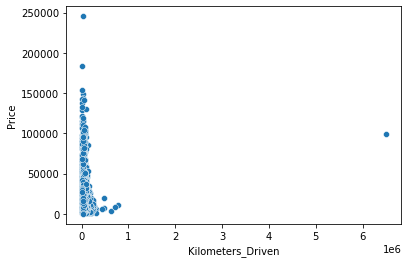

In [25]:
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price)

In [26]:
df[df["Price"]>150000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
4079,Land,Hyderabad,245273.6,2017,25000,Diesel,Automatic,First,13.33,2993,255,5.0,Land Rover Range Rover 3.0 Diesel LWB Vogue
5781,Lamborghini,Delhi,183955.2,2011,6500,Petrol,Automatic,Third,6.4,5204,560,2.0,Lamborghini Gallardo Coupe
5919,Jaguar,Hyderabad,153296.0,2015,8000,Petrol,Automatic,First,12.5,5000,488.1,2.0,Jaguar F Type 5.0 V8 S


In [27]:
df=df.drop(index=4079)
df=df.drop(index=5781)
df=df.drop(index=5919)

**#year변수**
- 중고차의 생산년도가 2016년임에도 동 생산년도의 차들보다 확연히 비싼값으로 팔림. 따라서 일반적이지 못하다고 판단하여 제거

<AxesSubplot:xlabel='Year', ylabel='Price'>

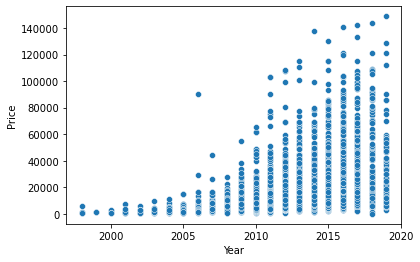

In [28]:
sns.scatterplot(x=df.Year, y=df.Price)

In [29]:
df[df['Year']==2006].sort_values('Price', ascending=False).head(1)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
5521,Bentley,Hyderabad,90444.64,2006,48000,Petrol,Automatic,First,8.6,5998,552,4.0,Bentley Continental Flying Spur


In [30]:
df=df.drop(index=5521)

**#Kilometers_Driven변수**  
: 인도 중고차 시장에서의 Kilometers_Driven을 잘 나타내지 못한다고 생각하여 지웠다.

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

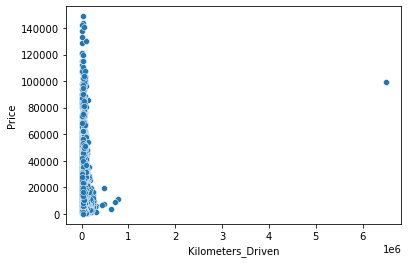

In [31]:
sns.scatterplot(x=df.Kilometers_Driven, y=df.Price)

In [32]:
df[(df["Kilometers_Driven"]>6000000)]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
2328,BMW,Chennai,99642.4,2017,6500000,Diesel,Automatic,First,15.97,2993,258,5.0,BMW X5 xDrive 30d M Sport


In [33]:
df.drop(index=2328, inplace = True)

**#Mileage 변수**  

In [34]:
df['Mileage'].replace(0.0, np.nan, inplace=True)
df['Mileage']=df['Mileage'].astype(float)

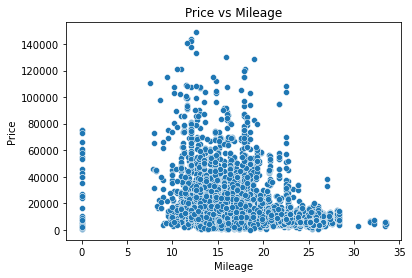

In [35]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Price vs Mileage')
plt.show()

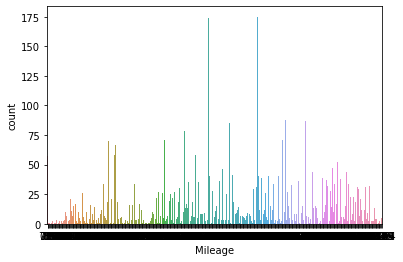

In [36]:
sns.countplot(x='Mileage', data=df)
plt.show()

- Mileage 변수와 Engine 변수 사이에 음의 상관관계가 있는 것으로 생각됨.

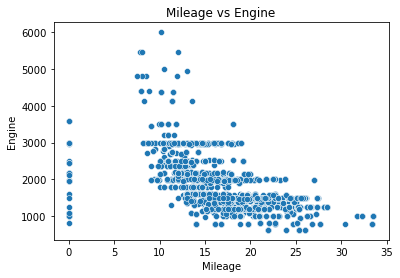

In [37]:
df['Engine']=df['Engine'].astype(float)
sns.scatterplot(x='Mileage', y='Engine', data=df)
plt.title('Mileage vs Engine')
plt.show()

In [38]:
df[df['Mileage']==0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
14,Land,Pune,26826.80,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115,5.0,Land Rover Freelander 2 TD4 SE
67,Mercedes-Benz,Coimbatore,54680.68,2019,15369,Diesel,Automatic,First,0.0,1950.0,194,5.0,Mercedes-Benz C-Class Progressive C 220d
79,Hyundai,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,0.0,1086.0,null,5.0,Hyundai Santro Xing XL
262,Hyundai,Hyderabad,2682.68,2006,99000,Petrol,Manual,First,0.0,1086.0,null,5.0,Hyundai Santro Xing XL
307,Hyundai,Chennai,2299.44,2006,58000,Petrol,Manual,Second,0.0,1086.0,null,5.0,Hyundai Santro Xing XL
424,Volkswagen,Hyderabad,8354.63,2010,42021,Diesel,Manual,First,0.0,1968.0,null,5.0,Volkswagen Jetta 2007-2011 1.9 L TDI
443,Hyundai,Coimbatore,5135.42,2012,50243,Petrol,Manual,First,0.0,1086.0,null,5.0,Hyundai Santro GLS I - Euro I
544,Mercedes-Benz,Kochi,59770.11,2019,13190,Petrol,Automatic,First,0.0,1950.0,181.43,5.0,Mercedes-Benz New C-Class Progressive C 200
631,Hyundai,Chennai,996.42,2002,70000,Petrol,Manual,Third,0.0,1086.0,null,5.0,Hyundai Santro LS zipPlus
647,Hyundai,Jaipur,1226.37,2004,200000,Petrol,Manual,First,0.0,1086.0,null,5.0,Hyundai Santro Xing XP


- 1차 보간: 같은 이름(origin_name)으로 보간

In [39]:
df['Mileage'].replace(0, np.nan, inplace=True)
df['Mileage'] = df.groupby('origin_name')['Mileage'].transform(lambda x: x.fillna(method='ffill'))

In [40]:
df[df['Mileage'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
14,Land,Pune,26826.80,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115,5.0,Land Rover Freelander 2 TD4 SE
67,Mercedes-Benz,Coimbatore,54680.68,2019,15369,Diesel,Automatic,First,NaN,1950.0,194,5.0,Mercedes-Benz C-Class Progressive C 220d
79,Hyundai,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,NaN,1086.0,null,5.0,Hyundai Santro Xing XL
262,Hyundai,Hyderabad,2682.68,2006,99000,Petrol,Manual,First,NaN,1086.0,null,5.0,Hyundai Santro Xing XL
307,Hyundai,Chennai,2299.44,2006,58000,Petrol,Manual,Second,NaN,1086.0,null,5.0,Hyundai Santro Xing XL
424,Volkswagen,Hyderabad,8354.63,2010,42021,Diesel,Manual,First,NaN,1968.0,null,5.0,Volkswagen Jetta 2007-2011 1.9 L TDI
443,Hyundai,Coimbatore,5135.42,2012,50243,Petrol,Manual,First,NaN,1086.0,null,5.0,Hyundai Santro GLS I - Euro I
544,Mercedes-Benz,Kochi,59770.11,2019,13190,Petrol,Automatic,First,NaN,1950.0,181.43,5.0,Mercedes-Benz New C-Class Progressive C 200
631,Hyundai,Chennai,996.42,2002,70000,Petrol,Manual,Third,NaN,1086.0,null,5.0,Hyundai Santro LS zipPlus
647,Hyundai,Jaipur,1226.37,2004,200000,Petrol,Manual,First,NaN,1086.0,null,5.0,Hyundai Santro Xing XP


- 2차보간:선형관계(상관관계)가 강할 것으로 생각되는 Engine 변수와의 회귀식을 이용해 보간

In [41]:
df.corr()['Mileage']

Price               -0.326722
Year                 0.297519
Kilometers_Driven   -0.143101
Mileage              1.000000
Engine              -0.646853
Seats               -0.351869
Name: Mileage, dtype: float64

In [42]:
mileage_reg = LinearRegression(fit_intercept=True).fit(df.dropna()[['Engine', 'Seats']], df.dropna()['Mileage'])
predicted_values = mileage_reg.predict(df[df['Mileage'].isna()][['Engine', 'Seats']])
df.loc[df['Mileage'].isna(), 'Mileage'] = predicted_values

In [43]:
df[df['Mileage'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name


**#Engine 변수**  
: Engine이 좋음에도 price가 싼 중고차들이 존재함

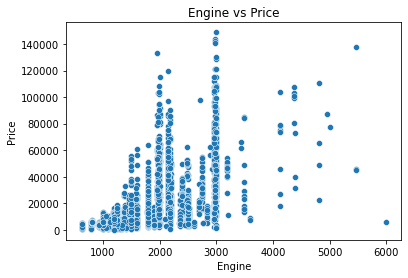

In [44]:
sns.scatterplot(x='Engine', y='Price', data=df)
plt.title('Engine vs Price')
plt.show()

- Engine의 성능이 좋으나, 가격이 낮은 중고차를 통해 어떠한 특징도 찾지 못함 따라서 이상치로 판단하지 못함

In [45]:
df[df['Engine']>5000].sort_values('Price')

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
6354,Bentley,Bangalore,5748.60,2008,31200,Petrol,Automatic,Second,10.20,5998.0,616,5.0,Bentley Flying Spur W12
4722,Mercedes-Benz,Kolkata,45222.32,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,Mercedes-Benz SL-Class SL 500
152,Mercedes-Benz,Kolkata,45988.80,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,Mercedes-Benz S Class 2005 2013 S 500
4691,Mercedes-Benz,Bangalore,137966.40,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421,2.0,Mercedes-Benz SLK-Class 55 AMG


**#Power 변수**  
: Power에 'null'(str형)이 존재함. 

- Power는 강한데 Engine은 약한 중고차에 대해 알아봄. 그러나 특징을 찾지못함. 따라서 이상치를 제거하지 않음.

In [46]:
df['Power'].replace('null ', 0, inplace=True)
df['Power'] = df['Power'].astype(float)

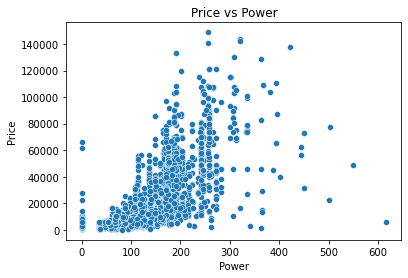

In [47]:
sns.scatterplot(x='Power', y='Price', data=df)
plt.title('Price vs Power')
plt.show()

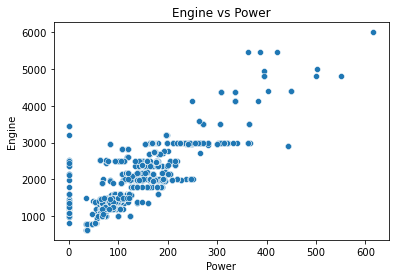

In [48]:
sns.scatterplot(x='Power', y='Engine', data=df)
plt.title('Engine vs Power')
plt.show()

In [49]:
df[df['Power']==0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
76,Ford,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.800000,1399.0,0.0,5.0,Ford Fiesta 1.4 SXi TDCi
79,Hyundai,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,20.813072,1086.0,0.0,5.0,Hyundai Santro Xing XL
89,Hyundai,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.000000,1086.0,0.0,5.0,Hyundai Santro Xing XO
120,Hyundai,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.000000,1086.0,0.0,5.0,Hyundai Santro Xing XL eRLX Euro III
143,Hyundai,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.000000,1086.0,0.0,5.0,Hyundai Santro Xing XO eRLX Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Hyundai,Chennai,2835.98,2007,79000,Petrol,Manual,First,17.000000,1086.0,0.0,5.0,Hyundai Santro Xing XO
5873,Hyundai,Pune,1839.55,2006,47200,Petrol,Manual,Second,17.000000,1086.0,0.0,5.0,Hyundai Santro Xing XO eRLX Euro II
5925,Skoda,Pune,4368.94,2010,85000,Petrol,Manual,First,17.500000,1798.0,0.0,5.0,Skoda Laura Classic 1.8 TSI
5943,Mahindra,Chennai,2606.03,2002,75000,Diesel,Manual,First,15.898073,2112.0,0.0,6.0,Mahindra Jeep MM 540 DP


- 1차 보간: 같은 이름(origin_name)으로 결측치 보간

In [50]:
df['Power'].replace(0, np.nan, inplace=True)
df['Power'] = df.groupby('origin_name')['Power'].transform(lambda x: x.fillna(method='ffill'))
df[df['Power'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
76,Ford,Jaipur,3065.92,2008,111111,Diesel,Manual,First,17.800000,1399.0,NaN,5.0,Ford Fiesta 1.4 SXi TDCi
79,Hyundai,Hyderabad,1992.85,2005,87591,Petrol,Manual,First,20.813072,1086.0,NaN,5.0,Hyundai Santro Xing XL
89,Hyundai,Hyderabad,3219.22,2007,73745,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XO
120,Hyundai,Mumbai,1303.02,2005,102000,Petrol,Manual,Second,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XL eRLX Euro III
143,Hyundai,Kochi,2560.04,2008,80759,Petrol,Manual,Third,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XO eRLX Euro II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5759,Hyundai,Kolkata,1517.63,2007,46707,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XL eRLX Euro III
5861,Hyundai,Chennai,2835.98,2007,79000,Petrol,Manual,First,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XO
5873,Hyundai,Pune,1839.55,2006,47200,Petrol,Manual,Second,17.000000,1086.0,NaN,5.0,Hyundai Santro Xing XO eRLX Euro II
5925,Skoda,Pune,4368.94,2010,85000,Petrol,Manual,First,17.500000,1798.0,NaN,5.0,Skoda Laura Classic 1.8 TSI


- 2차 보간 : Power변수와 강한 선형관계가 있는 것으로 판단되는 Engine, Mileage와의 회귀식을 이용한 선형보간

In [51]:
df.corr()['Power']

Price                0.754579
Year                 0.016174
Kilometers_Driven    0.005576
Mileage             -0.554947
Engine               0.862134
Power                1.000000
Seats                0.114163
Name: Power, dtype: float64

In [52]:
power_reg = LinearRegression(fit_intercept=True).fit(df.dropna()[['Engine', 'Mileage']], df.dropna()['Power'])
predicted_values = power_reg.predict(df[df['Power'].isna()][['Engine', 'Mileage']])
df.loc[df['Power'].isna(), 'Power'] = predicted_values

In [53]:
df[df['Power'].isna()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name


**#Seats 변수**  
: value에 0이 존재함,Seat 수는 0이 존재할 수 없다고 생각해 제거함.

In [54]:
df['Seats'].value_counts()

5.0     5163
7.0      698
8.0      136
4.0      101
6.0       32
2.0       15
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [55]:
df['Seats'].isnull().sum()

0

In [56]:
df[df['Seats']==0.0]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
3999,Audi,Hyderabad,27593.28,2012,125000,Petrol,Automatic,First,10.5,3197.0,234.526048,0.0,Audi A4 3.2 FSI Tiptronic Quattro


In [57]:
df=df.drop(index=3999)

In [58]:
df.reset_index(drop=True, inplace = True)
df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti Wagon R LXI CNG
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai Creta 1.6 CRDi SX Option
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda Jazz V
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti Ertiga VDI
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi A4 New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,Tata,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,Tata Tiago 1.05 Revotorq XT Option
6149,Ford,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,Ford EcoSport 1.5 Petrol Ambiente
6150,Jeep,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,Jeep Compass 1.4 Sport
6151,Maruti,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,Maruti Vitara Brezza ZDi


In [59]:
#나머지 모델을 돌리기 위한 연속, 범주형 설명변수 (+ float) 전처리 -> 전부 다 float 형태
def preprocess_df(df):
    # 원-핫 인코딩
    df_preprocessed = pd.get_dummies(df, columns=['Name', 'Location'])
    # Fuel_Type 레이블 인코딩
    fuel_type_mapping = {'Diesel': 3, 'Petrol': 2, 'CNG': 1, 'LPG': 1}
    df_preprocessed['Fuel_Type'] = df_preprocessed['Fuel_Type'].map(fuel_type_mapping)
    # Transmission 레이블 인코딩
    transmission_mapping = {'Automatic': 2, 'Manual': 1}
    df_preprocessed['Transmission'] = df_preprocessed['Transmission'].map(transmission_mapping)
    # Owner_Type 레이블 인코딩
    owner_type_mapping = {'First': 4, 'Second': 3, 'Third': 2, 'Fourth & Above': 1}
    df_preprocessed['Owner_Type'] = df_preprocessed['Owner_Type'].map(owner_type_mapping)
    # 불필요한 열 삭제
    df_preprocessed.drop(['origin_name'], axis=1, inplace=True)
    return df_preprocessed
df_preprocessed = preprocess_df(df)
df_preprocessed.head()

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,...,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2682.68,2010,72000,1,1,4,26.60,998.0,58.16,5.0,...,0,0,0,0,0,0,0,0,1,0
1,19162.00,2015,41000,3,1,4,19.67,1582.0,126.20,5.0,...,0,0,0,0,0,0,0,0,0,1
2,6898.32,2011,46000,2,1,4,18.20,1199.0,88.70,5.0,...,0,1,0,0,0,0,0,0,0,0
3,9197.76,2012,87000,3,1,4,20.77,1248.0,88.76,7.0,...,0,1,0,0,0,0,0,0,0,0
4,27194.71,2013,40670,3,2,3,15.20,1968.0,140.80,5.0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
df.to_csv("df.csv",index = False)

In [61]:
df_preprocessed.to_csv('df_preprocessed1', index = False) 

# 3. EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6153 non-null   object 
 1   Location           6153 non-null   object 
 2   Price              6153 non-null   float64
 3   Year               6153 non-null   int64  
 4   Kilometers_Driven  6153 non-null   int64  
 5   Fuel_Type          6153 non-null   object 
 6   Transmission       6153 non-null   object 
 7   Owner_Type         6153 non-null   object 
 8   Mileage            6153 non-null   float64
 9   Engine             6153 non-null   float64
 10  Power              6153 non-null   float64
 11  Seats              6153 non-null   float64
 12  origin_name        6153 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 625.0+ KB


<AxesSubplot:>

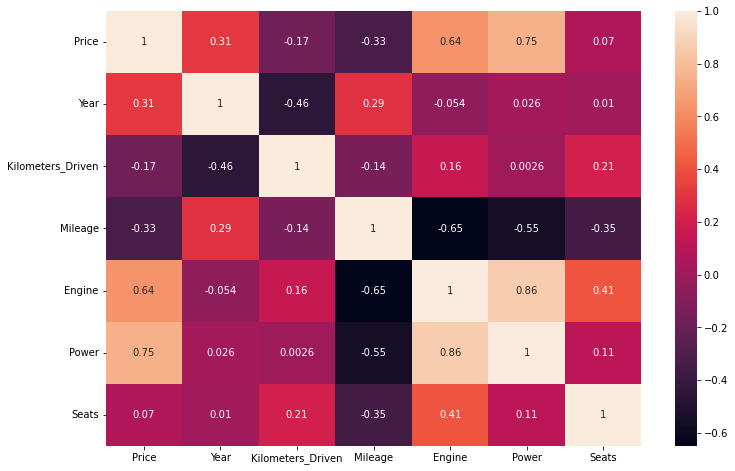

In [63]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 1.0, 'Price')

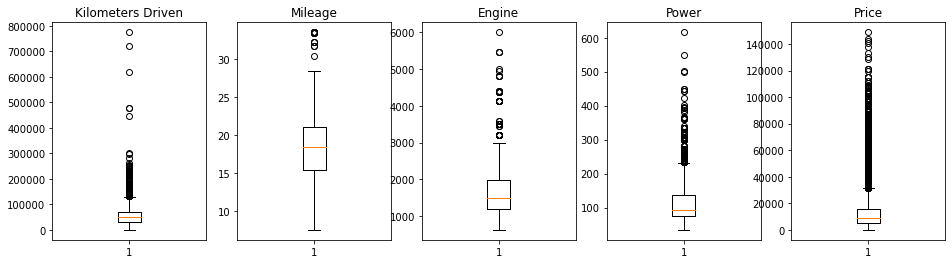

In [64]:
# boxplot 확인
fig, ax = plt.subplots(1,5, figsize=(16,4))

ax[0].boxplot(df.Kilometers_Driven)
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(df.Mileage)
ax[1].set_title("Mileage")

ax[2].boxplot(df.Engine)
ax[2].set_title("Engine")

ax[3].boxplot(df.Power)
ax[3].set_title("Power")

ax[4].boxplot(df.Price)
ax[4].set_title("Price")

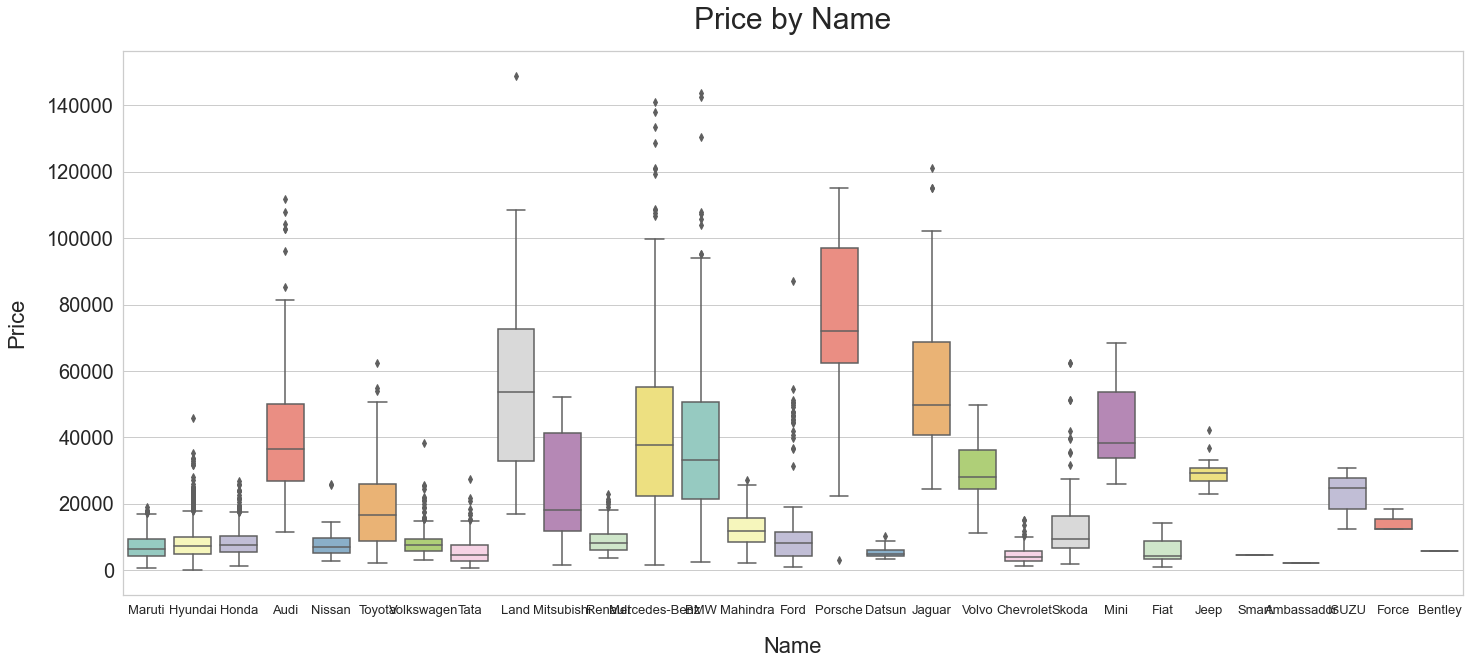

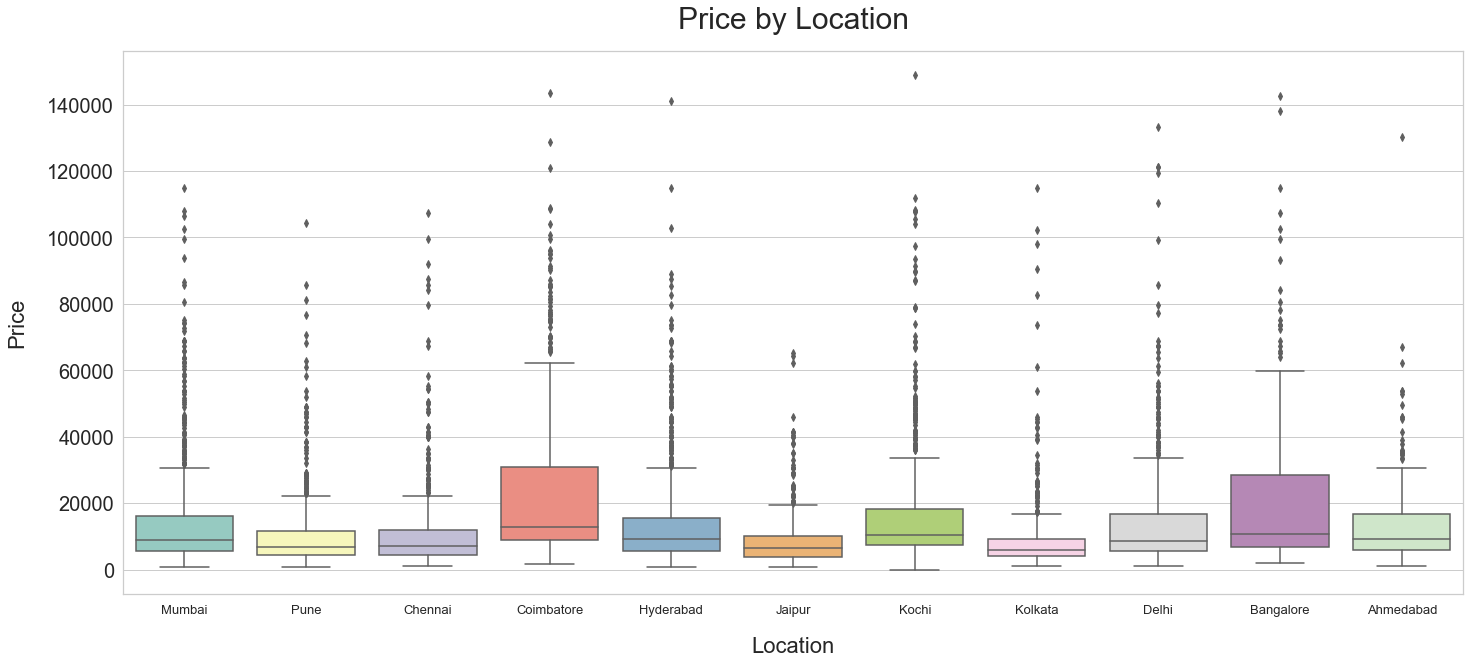

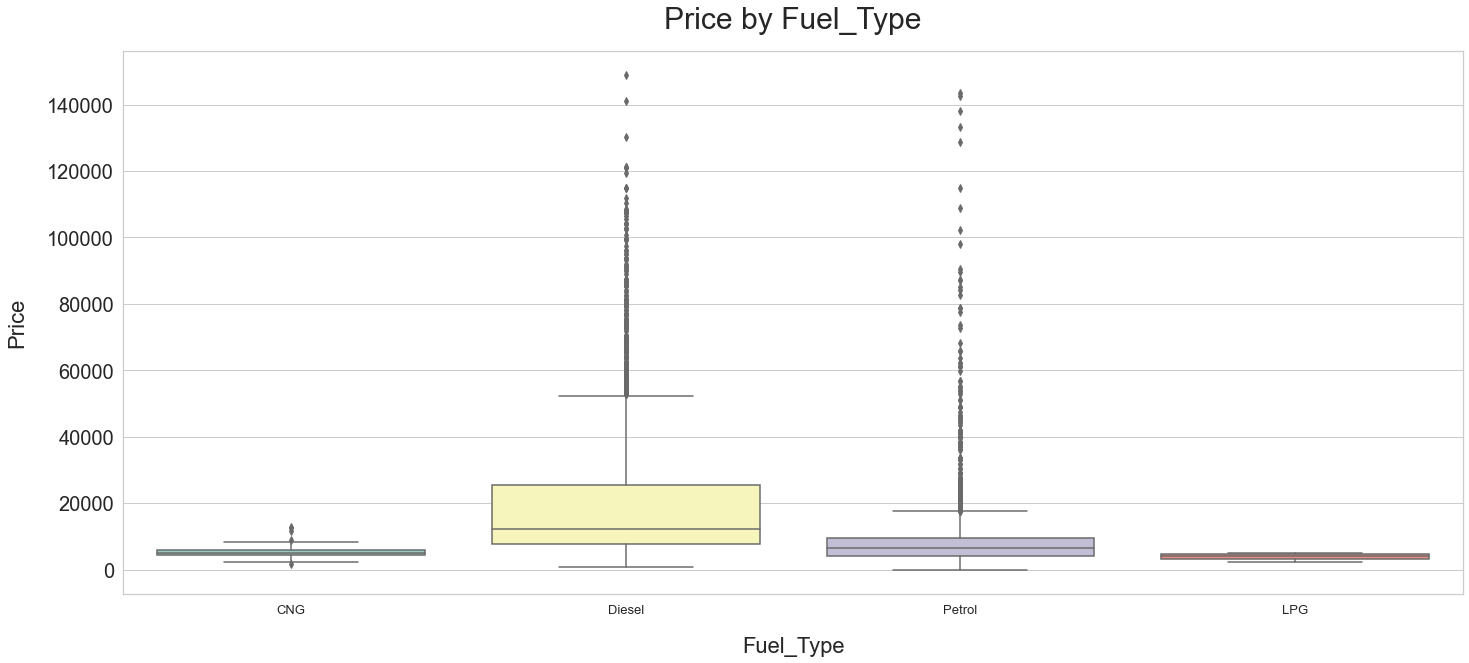

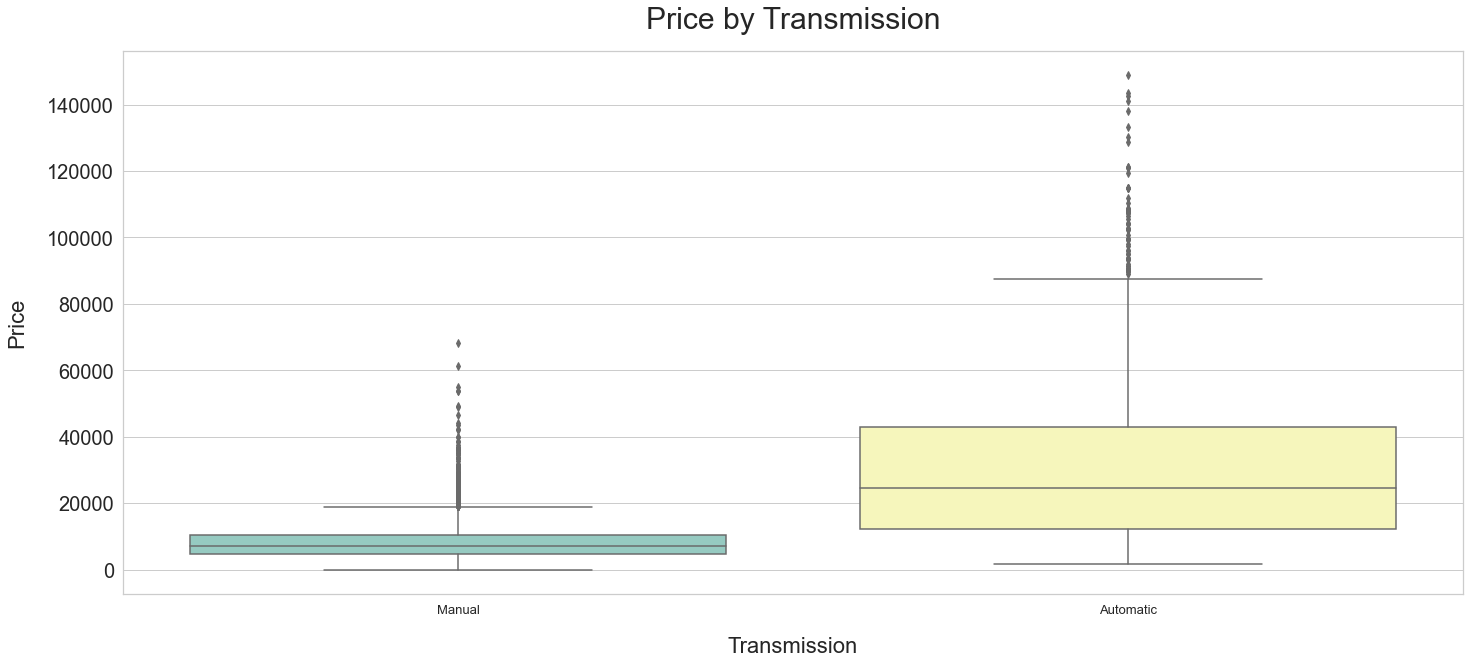

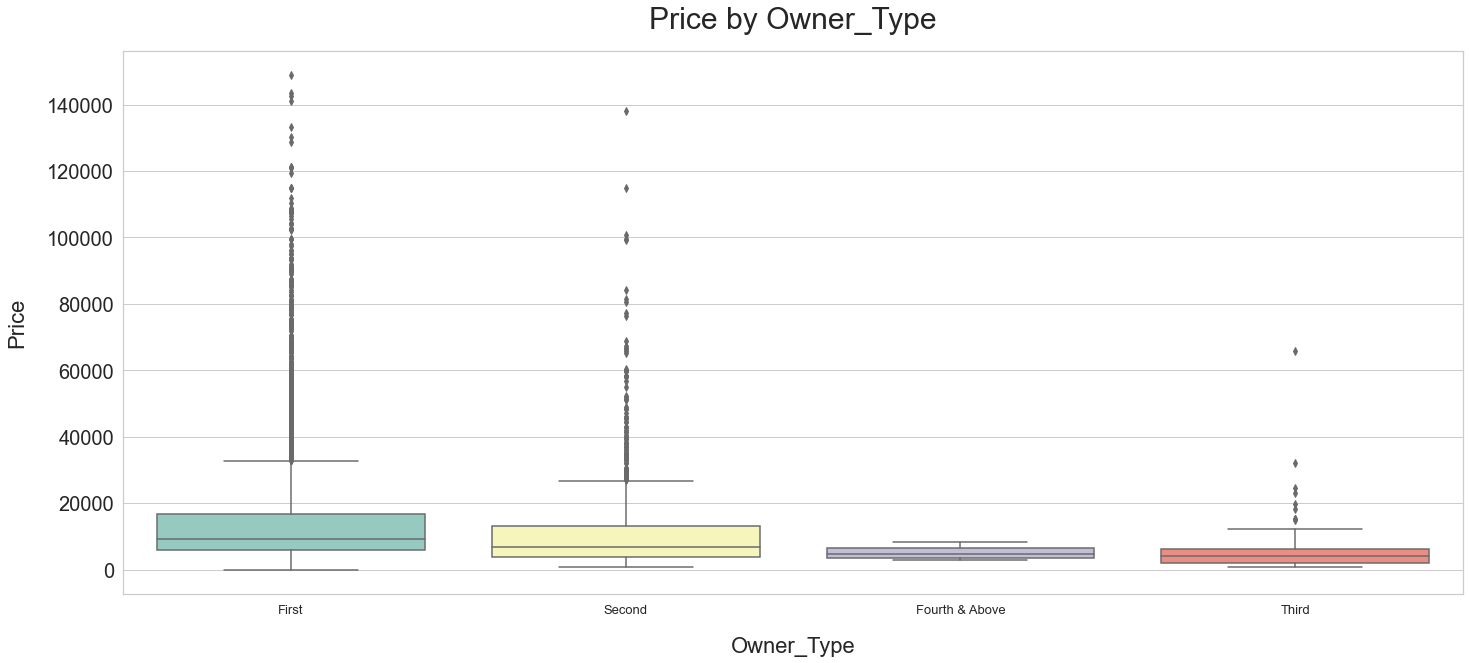

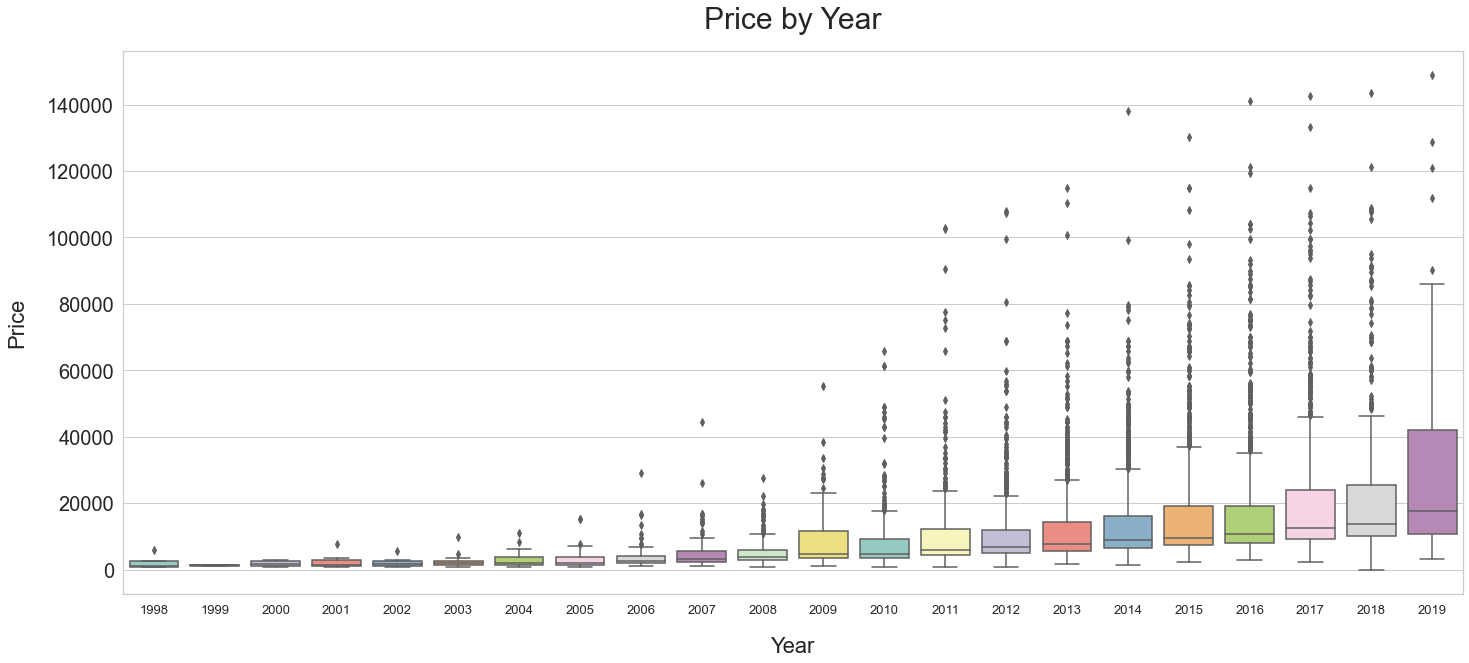

In [65]:
dummies = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type", "Year"]
name = ["brand", "location", "fuel type", "transmission", "owner type"]
# 범주형 데이터와 price 간의 boxplot
for dum in dummies:
    plt.figure(figsize=(24,10))
    sns.set_theme(style="whitegrid")
    sns.boxplot(x=dum, y="Price", 
                data=df, palette="Set3")
    
    plt.title("Price by "+ dum, fontsize=30, y=1.03)
    
    plt.xticks(fontsize=13)
    plt.xlabel(dum, fontsize=22, labelpad=20)
    
    plt.yticks(fontsize=20)
    plt.ylabel("Price", fontsize=22, labelpad=20)
    
    plt.show()

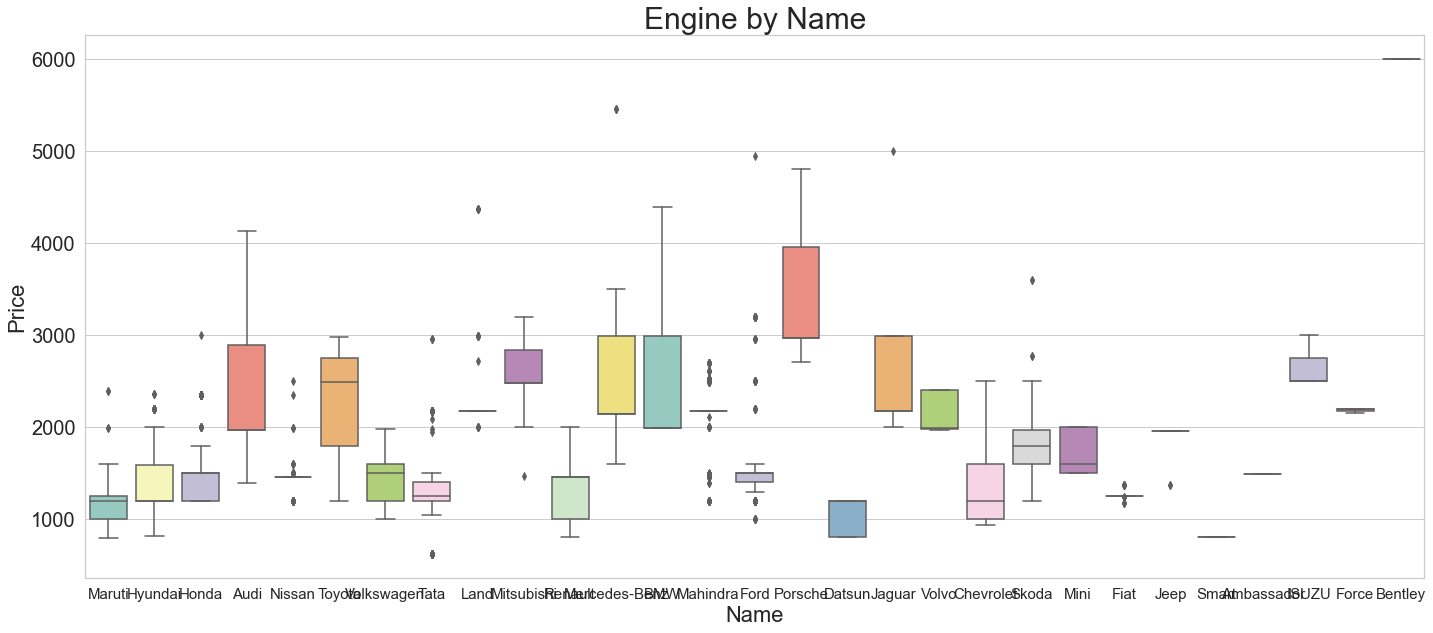

In [66]:
# 브랜드별 엔진 성능
plt.figure(figsize=(24,10))
sns.set_theme(style="whitegrid")
sns.boxplot(x="Name", y="Engine", 
            data=df, palette="Set3")
plt.title("Engine by Name", fontsize=30)
plt.xticks(fontsize=15)
plt.xlabel("Name", fontsize=22)
plt.yticks(fontsize=20)
plt.ylabel("Price", fontsize=22)
plt.show()

In [67]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'origin_name'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

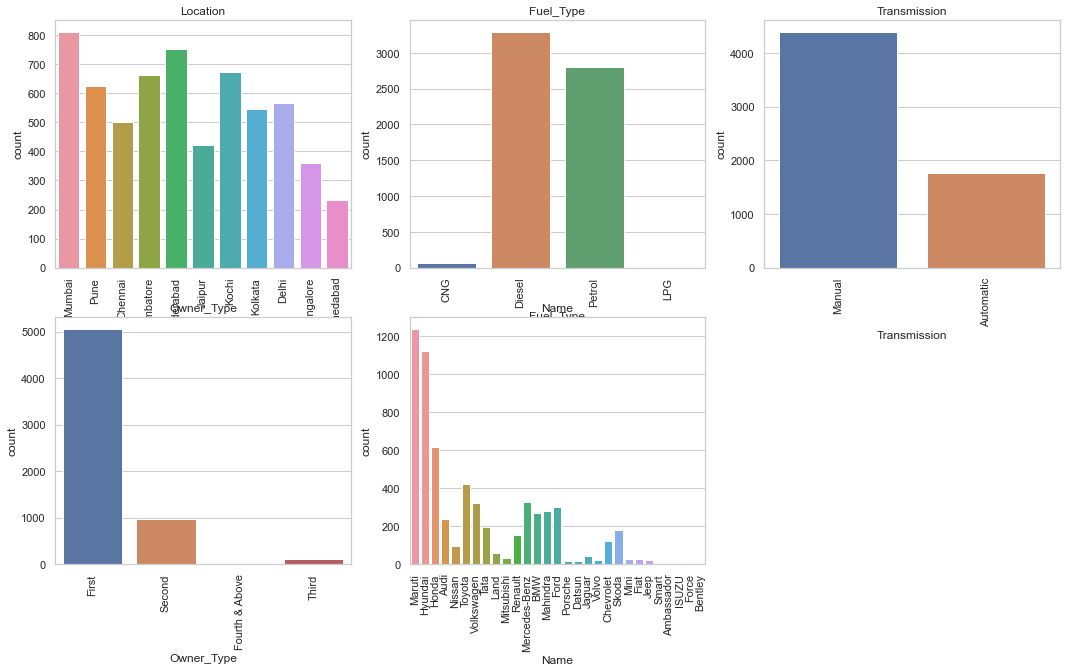

In [68]:
category_variable = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Name']
plt.figure(figsize=(18,10))
for i,col in enumerate(category_variable) :
  plt.subplot(2,3,i+1)
  sns.countplot(data=df, x= col)
  plt.xticks(rotation=90)
  plt.title(col)
plt.show

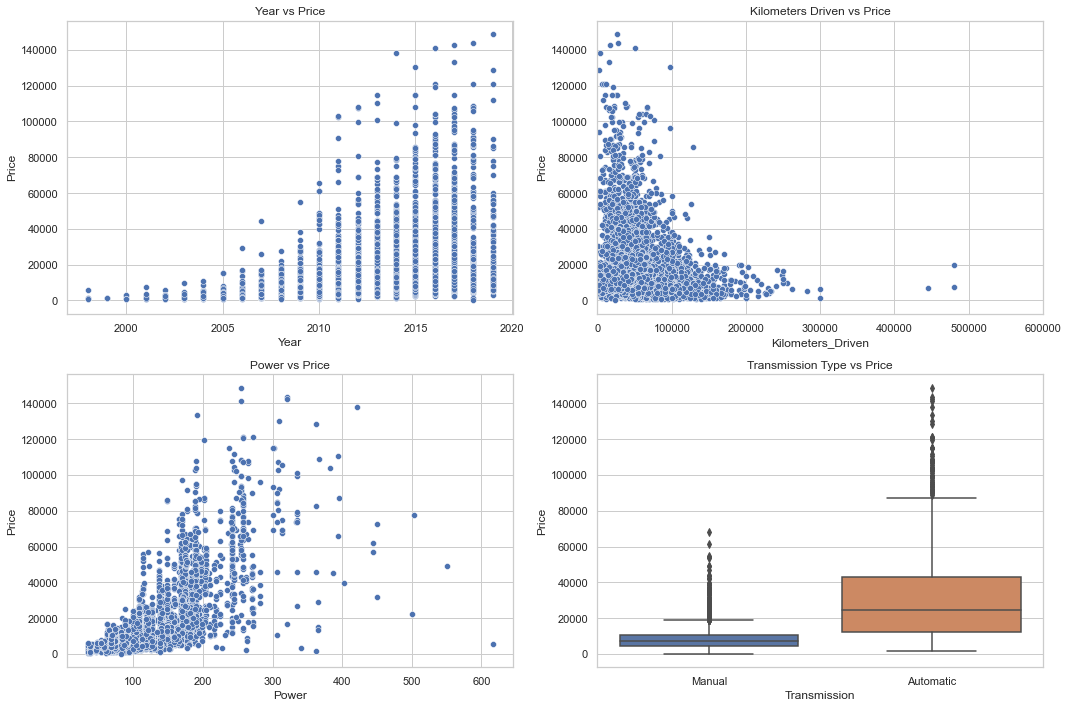

In [69]:
# Setting up the matplotlib figure for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Scatter plot for Year vs Price
sns.scatterplot(ax=axs[0, 0], data=df, x='Year', y='Price')
axs[0, 0].set_title('Year vs Price')

# Scatter plot for Kilometers_Driven vs Price
sns.scatterplot(ax=axs[0, 1], data=df, x='Kilometers_Driven', y='Price')
axs[0, 1].set_title('Kilometers Driven vs Price')
axs[0, 1].set(xlim=(0, 600000))  # Limit x-axis for better visibility

# Scatter plot for Power vs Price
sns.scatterplot(ax=axs[1, 0], data=df, x='Power', y='Price')
axs[1, 0].set_title('Power vs Price')

# Box plot for Transmission type vs Price
sns.boxplot(ax=axs[1, 1], data=df, x='Transmission', y='Price')
axs[1, 1].set_title('Transmission Type vs Price')

plt.tight_layout()
plt.show()

In [70]:
#train, test set 분리
from sklearn.model_selection import train_test_split
df_y = df["Price"]
df_x = df.drop('Price', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=500)
print('train data X size :{}'.format(df_train_x.shape))
print('train data Y size :{}'.format(df_train_y.shape))
print('test data X size :{}'.format(df_test_x.shape))
print('test data Y size :{}'.format(df_test_y.shape))

train data X size :(4307, 12)
train data Y size :(4307,)
test data X size :(1846, 12)
test data Y size :(1846,)


### 정규성 검정

In [71]:
#정규성 검정 함수
def shapiro_function(df, col):
    col_df = []
    for value in sorted(df[col].unique()):
        col_df.append(df[df[col] == value]['Price'])

    for i, list in enumerate(col_df):
        statistic, p_value = shapiro(list)

        print("Shapiro-Wilk 검정 결과:")
        print("통계량(statistic):", statistic)
        print("p-value:", p_value)
        alpha = 0.05
        print(sorted(df[col].unique())[i])
        if p_value < alpha:
            print("p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.")
            print("*"*100)
        else:
            print("p-value가 유의수준보다 크므로 데이터가 정규 분포를 따를 가능성이 있습니다.")
            print("*"*100)
    return col_df

### 세 집단이상 평균검정

In [72]:
#비모수 평균검정(크루스칼 왈리스)
def kruskal_function(df, col, col_list):
    statistic, p_value = kruskal(*col_list)

    # 결과 출력
    print("Kruskal-Wallis Test 결과:")
    print("검정 통계량:", statistic)
    print("p-value:", p_value)

    # p-value를 기준으로 결과 해석
    alpha = 0.05
    if p_value < alpha:
        print("p-value가 유의수준보다 작으므로 집단 간의 평균 차이가 통계적으로 유의미합니다.")
        print()
        print("다수의 그룹 간에 평균 차이가 있는 것으로 나타났으므로 사후 검정을 수행합니다.")
        # 다항 비교 방법으로 Conover-Iman 검정 수행
        tukey_result = pairwise_tukeyhsd([element for sublist in col_list for element in sublist],
                                         np.repeat([f"{i}_group" for i in sorted(df[col].unique())],
                                                   [len(num) for num in col_list]))
        print(tukey_result)

    else:
        print("p-value가 유의수준보다 크므로 집단 간의 평균 차이가 통계적으로 유의미하지 않습니다.")

## 4. 변수 탐색

### 4.1 Location

In [73]:
df.groupby('Location')['Price'].describe().sort_values('75%')

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Kolkata,547.0,9131.425082,11843.882847,996.42,4062.3400,5825.250,9197.7600,114972.00
Jaipur,422.0,9153.623910,9156.000382,689.83,3836.2325,6515.080,10232.5075,65150.80
Pune,624.0,10664.881490,12164.647278,674.50,4273.1275,6752.685,11715.6425,104241.28
Chennai,501.0,11765.880898,14279.906928,996.42,4445.5800,7158.920,11803.7900,107307.20
Hyderabad,754.0,14801.867162,16357.341690,919.78,5518.6600,9121.110,15674.5175,141047.65
Mumbai,811.0,15000.627670,16261.458252,843.13,5748.6000,9044.460,16096.0800,114972.00
Ahmedabad,232.0,13836.747371,13994.826464,1149.72,5978.5400,9197.760,16747.5850,130301.60
Delhi,566.0,15080.344788,17393.207251,1149.72,5595.3000,8645.890,16862.5600,133321.53
Kochi,673.0,17306.809926,18535.229924,7.08,7342.8800,10347.480,18119.5900,148804.43


In [74]:
# 해당 지역 (각각 Delhi, Hyderabad)의 평균들이 다른 지역들에 비해 높지 않은 지역임을 감안하여, 이상치로 판단하고 제거함
# df[df['Price']>170000]
# df = df.drop(index = [2807, 2849])

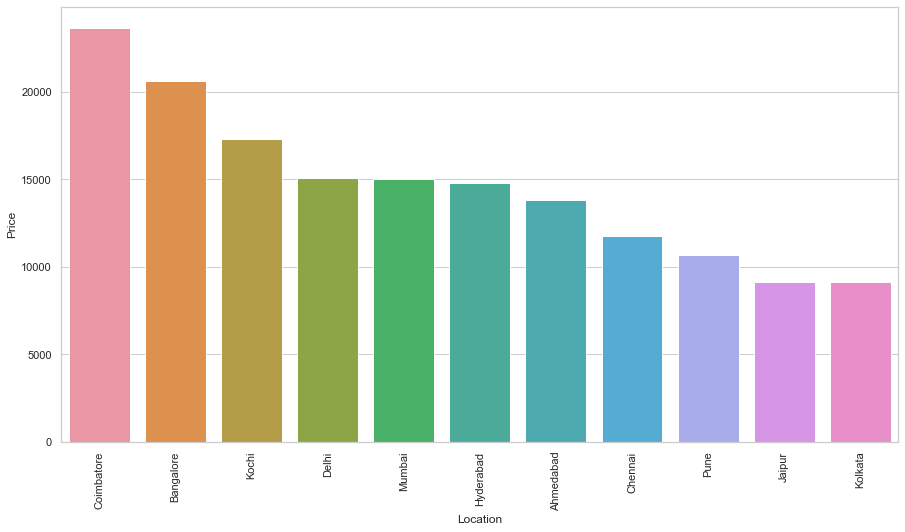

In [75]:
# 위치(Location)별 Price의 평균 계산
mean_price_by_location = df.groupby('Location')['Price'].mean().reset_index()
mean_price_by_location = mean_price_by_location.sort_values(by='Price', ascending=False)

# 바 플롯 그리기
plt.figure(figsize=(15,8))
sns.barplot(data=mean_price_by_location, x='Location', y='Price', order=mean_price_by_location['Location'])
plt.xticks(rotation=90)
plt.show()

In [76]:
loc_list = shapiro_function(df, 'Location')

Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6764568090438843
p-value: 7.929817833234317e-21
Ahmedabad
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.7304006814956665
p-value: 9.109790977041211e-24
Bangalore
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6113479137420654
p-value: 5.045383971949671e-32
Chennai
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.7569037675857544
p-value: 4.360845933414984e-30
Coimbatore
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.639

11개의 도시별 평균차이 검정

Bangalore와 Coimbatore 도시는 다른 도시들 보다 평균이 유의미하게 높고 서로의 평균은 차이가 없는 것으로 판단되었다.
이에 따라 2개의 그룹으로 나누어 분석을 진행할 수 있을 것으로 생각된다.  
(평균 Price가 더 높은 그룹 - Bangalore, Coimbatore  
평균 Price가 보통으로 구분되지 않는 그룹 - 'Mumbai', 'Delhi','Hyderabad', 'Kochi', 'Ahmedabad', kolkata, pune, jaipur, chennai)

In [77]:
kruskal_function(df, 'Location', loc_list)

Kruskal-Wallis Test 결과:
검정 통계량: 656.1046163281432
p-value: 1.6503097916632418e-134
p-value가 유의수준보다 작으므로 집단 간의 평균 차이가 통계적으로 유의미합니다.

다수의 그룹 간에 평균 차이가 있는 것으로 나타났으므로 사후 검정을 수행합니다.
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
     group1           group2        meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------
 Ahmedabad_group  Bangalore_group   6754.4722 0.0001   2246.3849  11262.5594   True
 Ahmedabad_group    Chennai_group  -2070.8665  0.896  -6325.3974   2183.6645  False
 Ahmedabad_group Coimbatore_group   9836.1612   -0.0   5748.6559  13923.6665   True
 Ahmedabad_group      Delhi_group   1243.5974  0.997  -2932.8959   5420.0908  False
 Ahmedabad_group  Hyderabad_group    965.1198 0.9995  -3057.1514    4987.391  False
 Ahmedabad_group     Jaipur_group  -4683.1235 0.0244  -9061.8842   -304.3628   True
 Ahmedabad_group      Kochi_group   3470.0626 0.1826   -608.7648   

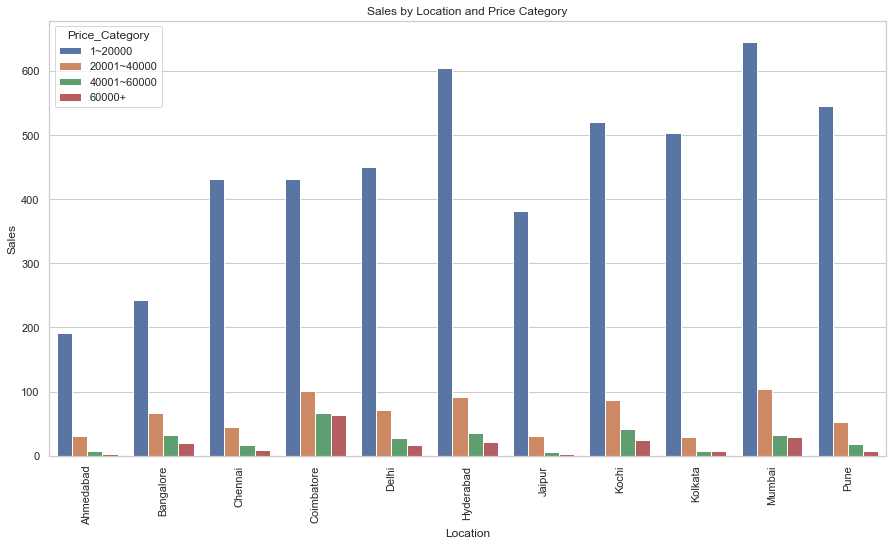

In [78]:
# Price를 범주화하여 새로운 열인 Price_Category 추가
df['Price_Category'] = pd.cut(df['Price'], bins=[0, 20000, 40000, 60000, float('inf')], labels=['1~20000', '20001~40000', '40001~60000', '60000+'])

# 지역별, 가격 범주별 판매대수 계산
sales_by_location_price = df.groupby(['Location', 'Price_Category']).size().reset_index(name='Sales')

# 시각화
plt.figure(figsize=(15, 8))
sns.barplot(data=sales_by_location_price, x='Location', y='Sales', hue='Price_Category')
plt.xticks(rotation=90)
plt.title('Sales by Location and Price Category')
plt.xlabel('Location')
plt.ylabel('Sales')
plt.show()

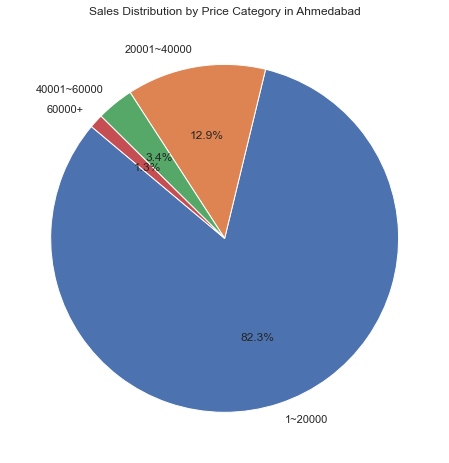

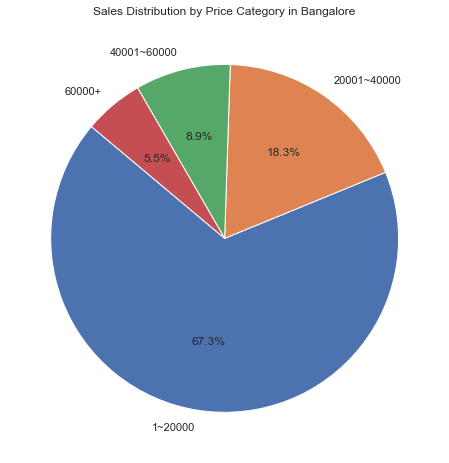

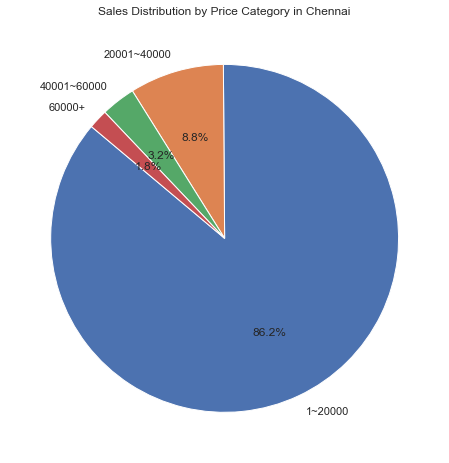

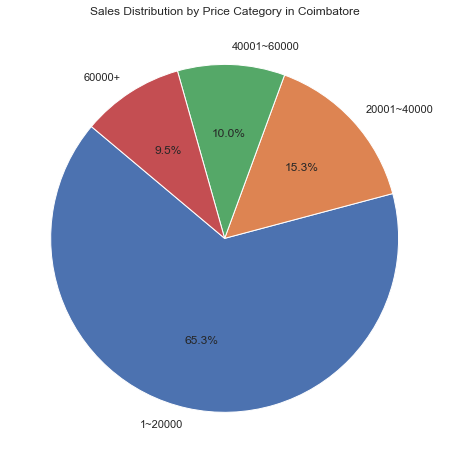

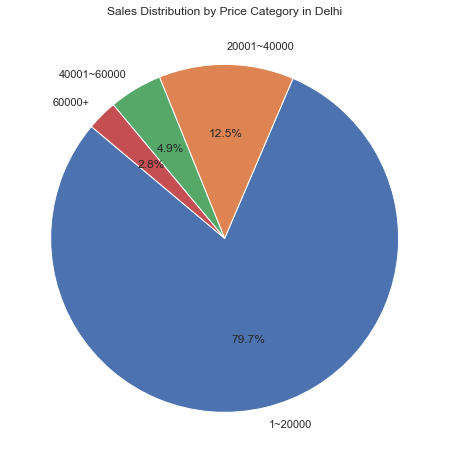

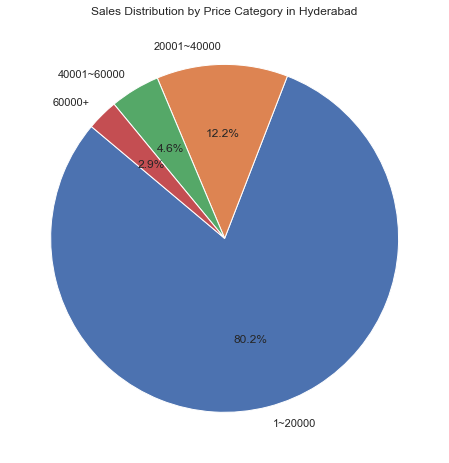

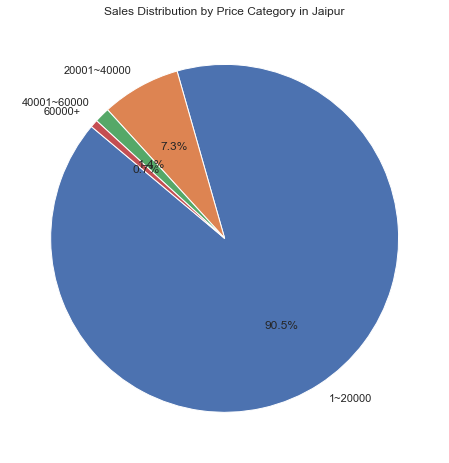

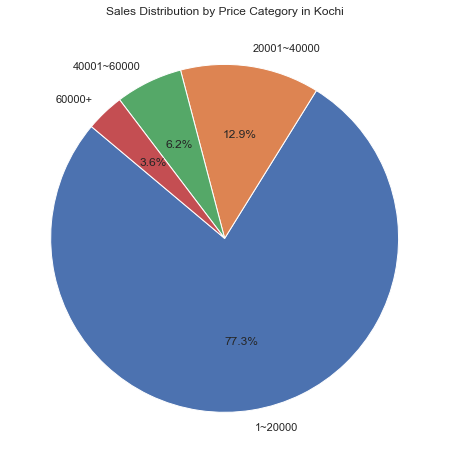

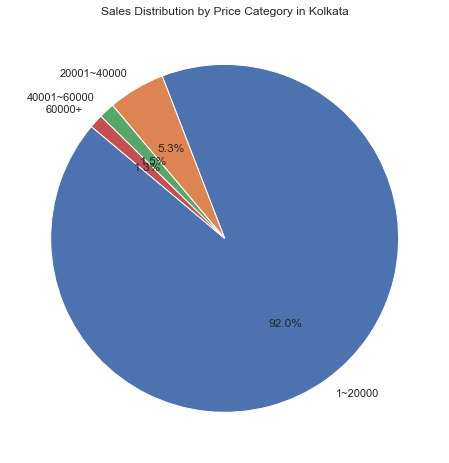

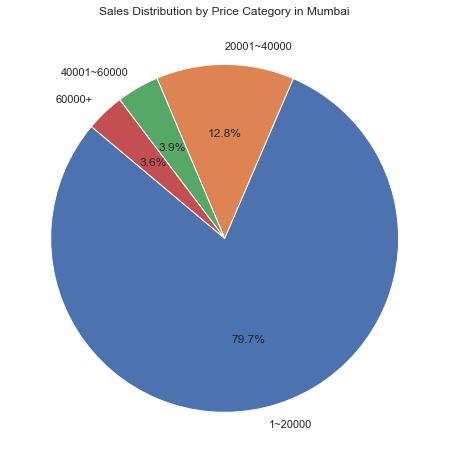

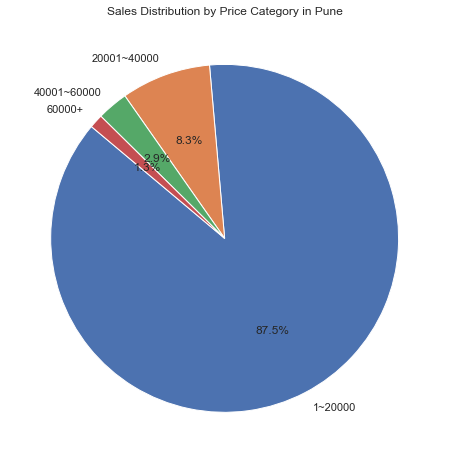

In [79]:
# 각 지역별로 파이 차트 생성
for location, subset in sales_by_location_price.groupby('Location'):
    plt.figure(figsize=(8, 8))
    plt.pie(subset['Sales'], labels=subset['Price_Category'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Sales Distribution by Price Category in {location}')
    plt.show()

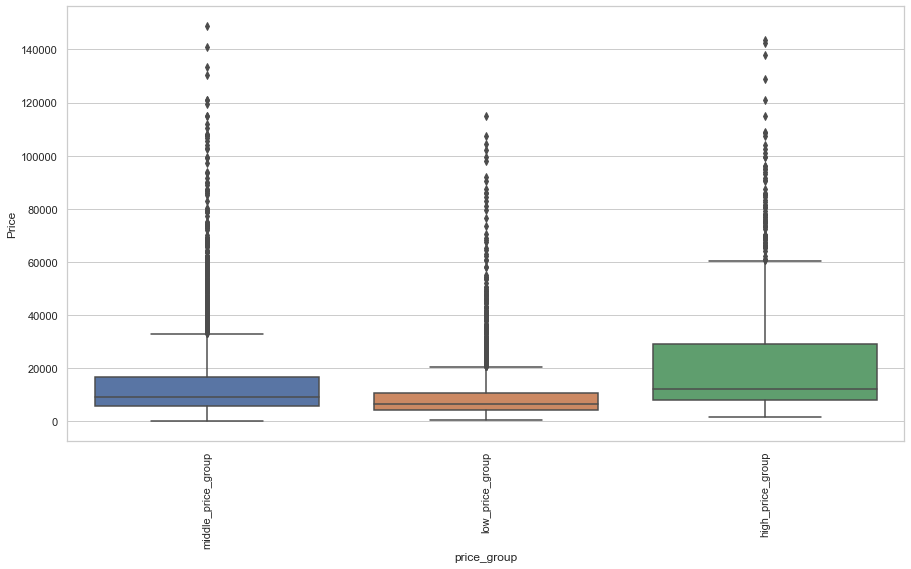

In [80]:
df['price_group'] = 'middle_price_group'
df.loc[(df['Location']=='Bangalore')|(df['Location']=='Coimbatore'), 'price_group']='high_price_group'
df.loc[(df['Location']=='Bangalore')|(df['Location']=='Coimbatore'), 'price_group']='high_price_group'
df.loc[(df['Location']=='Kolkata')|(df['Location']=='Pune')|
       (df['Location']=='Jaipur')|(df['Location']=='Chennai'), 'price_group']='low_price_group'
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x=df['price_group'], y=df['Price'])
plt.xticks(rotation=90)
plt.show()

In [4]:
pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium
# 각 지역별 빈도수 데이터
location_counts = {
    'Mumbai': 949, 'Hyderabad': 876, 'Coimbatore': 772, 'Kochi': 772,
    'Pune': 765, 'Delhi': 660, 'Kolkata': 654, 'Chennai': 591,
    'Jaipur': 499, 'Bangalore': 440, 'Ahmedabad': 275
}
# 각 지역별 위도, 경도 정보 (예시 데이터)
location_data = {
    'Location': ['Mumbai', 'Hyderabad', 'Coimbatore', 'Kochi', 'Pune', 'Delhi', 'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad'],
    'Latitude': [19.0760, 17.3850, 11.0168, 9.9312, 18.5204, 28.7041, 22.5726, 13.0827, 26.9124, 12.9716, 23.0225],
    'Longitude': [72.8777, 78.4867, 76.9558, 76.2673, 73.8567, 77.1025, 88.3639, 80.2707, 75.7873, 77.5946, 72.5714]
}
# 데이터프레임 생성
location_df = pd.DataFrame(location_data)
# folium 지도 생성 (인도의 대략적인 중심 좌표로 시작)
india_loc_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
# 각 지역별 마커 추가
for i, row in location_df.iterrows():
    # 빈도수 정보를 팝업에 추가
    popup_text = f"{row['Location']}: {location_counts[row['Location']]} listings"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
    ).add_to(india_loc_map)

# 지도를 HTML 파일로 저장
india_loc_map.save('india_locs_map.png')

# 지도 표시
india_map

In [10]:
# 인도의 중심에 대한 위도와 경도
india_latitude = 20.5937
india_longitude = 78.9629

# 인도 지도 생성
india_port_map = folium.Map(location=[india_latitude, india_longitude], zoom_start=5)

# 항만의 이름과 위치 (위도, 경도) 정보 (10개로 확장)
ports = [
    {"name": "Mumbai Port", "location": [18.9389, 72.8353]},
    {"name": "Kandla Port", "location": [23.0031, 70.2128]},
    {"name": "Chennai Port", "location": [13.0827, 80.2707]},
    {"name": "Kolkata Port", "location": [22.5626, 88.3420]},
    {"name": "Cochin Port", "location": [9.9475, 76.2539]},
    {"name": "Paradip Port", "location": [20.3166, 86.7102]},
    {"name": "Jawaharlal Nehru Port", "location": [18.949, 72.949]},
    {"name": "Visakhapatnam Port", "location": [17.6868, 83.2185]},
    {"name": "Mundra Port", "location": [22.7333, 69.7000]},
    {"name": "Tuticorin Port", "location": [8.7642, 78.1348]},
]

# 각 항만을 지도에 마커로 추가
for port in ports:
    folium.Marker(
        location=port["location"],
        popup=port["name"],
        icon=folium.Icon(color='blue', icon='anchor', prefix='fa')
    ).add_to(india_port_map)

# 지도를 HTML 파일로 저장
india_port_map.save('india_ports_map.png')

# 지도를 직접 Jupyter 노트북 안에서 표시 (Jupyter 노트북에서 실행하는 경우)
india_map

### 4.2 Kilometers_Driven

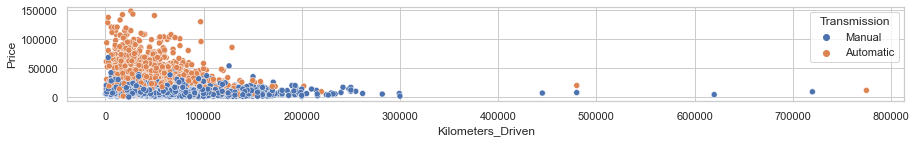

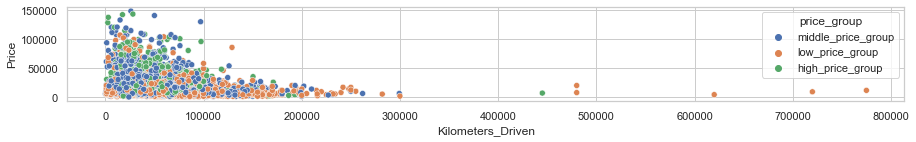

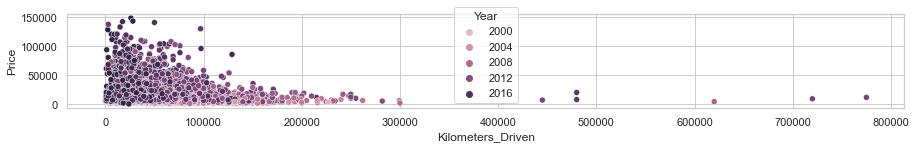

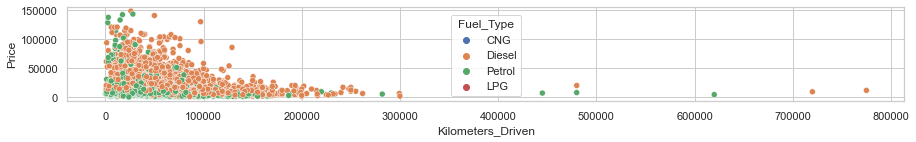

In [83]:
#범주형 변수에 따른 Kilometers_Driven과 Price의 scatter plot
for i, col in enumerate(['Transmission', 'price_group', 'Year', 'Fuel_Type']):    
    plt.figure(figsize=(15,8))
    plt.subplot(4,1,i+1)
    sns.scatterplot(data=df, x=df['Kilometers_Driven'], y=df['Price'], hue=df[col])
plt.show()

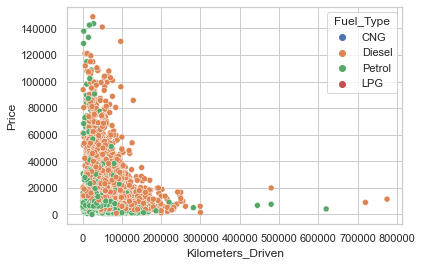

In [84]:
sns.scatterplot(data=df, x=df['Kilometers_Driven'], y=df['Price'], hue=df[col])
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6153 non-null   object  
 1   Location           6153 non-null   object  
 2   Price              6153 non-null   float64 
 3   Year               6153 non-null   int64   
 4   Kilometers_Driven  6153 non-null   int64   
 5   Fuel_Type          6153 non-null   object  
 6   Transmission       6153 non-null   object  
 7   Owner_Type         6153 non-null   object  
 8   Mileage            6153 non-null   float64 
 9   Engine             6153 non-null   float64 
 10  Power              6153 non-null   float64 
 11  Seats              6153 non-null   float64 
 12  origin_name        6153 non-null   object  
 13  Price_Category     6153 non-null   category
 14  price_group        6153 non-null   object  
dtypes: category(1), float64(5), int64(2), object(7)
memory 

### 4.3 Seats

In [86]:
df['Seats'].value_counts()

5.0     5163
7.0      698
8.0      136
4.0      101
6.0       32
2.0       15
10.0       5
9.0        3
Name: Seats, dtype: int64

In [87]:
df.groupby('Seats')['Price'].mean()

Seats
2.0     67905.018667
4.0     31443.285743
5.0     13325.268660
6.0     14658.450937
7.0     23087.651461
8.0     11773.357941
9.0      6821.673333
10.0     6561.068000
Name: Price, dtype: float64

In [88]:
# 'Sorts_of_cars' 열 생성 및 초기화
df['Sorts_of_cars'] = np.nan

# 'Seats' 열 값에 따라 'Sorts_of_cars' 열 값 할당
df.loc[df['Seats'] == 2, 'Sorts_of_cars'] = 'Luxury'
df.loc[df['Seats'] == 4, 'Sorts_of_cars'] = 'Sedan'
df.loc[df['Seats'] == 5, 'Sorts_of_cars'] = 'General'
df.loc[df['Seats'] >= 6, 'Sorts_of_cars'] = 'SUV'

df

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,origin_name,Price_Category,price_group,Sorts_of_cars
0,Maruti,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti Wagon R LXI CNG,1~20000,middle_price_group,General
1,Hyundai,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai Creta 1.6 CRDi SX Option,1~20000,low_price_group,General
2,Honda,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda Jazz V,1~20000,low_price_group,General
3,Maruti,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti Ertiga VDI,1~20000,low_price_group,SUV
4,Audi,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi A4 New 2.0 TDI Multitronic,20001~40000,high_price_group,General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6148,Tata,Pune,10822.70,2016,41413,Diesel,Manual,First,27.28,1047.0,69.00,5.0,Tata Tiago 1.05 Revotorq XT Option,1~20000,low_price_group,General
6149,Ford,Kochi,13474.72,2017,39015,Petrol,Manual,First,17.00,1497.0,121.36,5.0,Ford EcoSport 1.5 Petrol Ambiente,1~20000,middle_price_group,General
6150,Jeep,Mumbai,27838.55,2018,6000,Petrol,Manual,First,16.00,1368.0,160.00,5.0,Jeep Compass 1.4 Sport,20001~40000,middle_price_group,General
6151,Maruti,Kochi,16203.39,2017,21380,Diesel,Manual,First,24.30,1248.0,88.50,5.0,Maruti Vitara Brezza ZDi,1~20000,middle_price_group,General


<AxesSubplot:xlabel='Sorts_of_cars', ylabel='Count'>

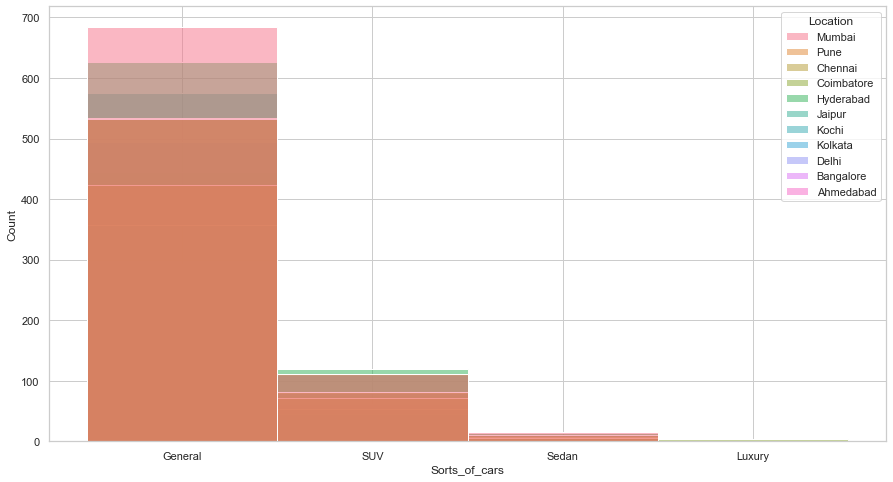

In [89]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Sorts_of_cars', hue = 'Location')

### 4.4 Fuel_Type

In [90]:
#T-검정: 예를 들어, 디젤과 휘발유 차량의 가격 차이가 통계적으로 유의한지 확인
# 디젤과 휘발유 차량 필터링
diesel_prices = df[df['Fuel_Type'] == 'Diesel']['Price']
petrol_prices = df[df['Fuel_Type'] == 'Petrol']['Price']
# T-검정 수행
t_stat, p_value = stats.ttest_ind(diesel_prices, petrol_prices, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 27.65546839150249, P-value: 2.1030206733263644e-157


In [91]:
#카이 제곱 검정: 예를 들어, 차량 위치와 연료 유형 간의 독립성 검정
# 교차 테이블 생성
cross_tab = pd.crosstab(df['Location'], df['Fuel_Type'])
# 카이 제곱 검정 수행
chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
print(f'Chi2 Stat: {chi2_stat}, P-value: {p_val}')

Chi2 Stat: 259.3407892015515, P-value: 2.3626501549342205e-38


### 4.5 Transmission

In [92]:
# 수동 변속기와 자동 변속기 차량의 마일리지 필터링
manual_mileage = df[df['Transmission'] == 'Manual']['Mileage']
automatic_mileage = df[df['Transmission'] == 'Automatic']['Mileage']

# T-검정 수행
t_stat, p_value = stats.ttest_ind(manual_mileage, automatic_mileage, equal_var=False)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

T-statistic: 31.33429057960068, P-value: 4.151759105743141e-190


## 5. 변수 간의 검정

#### 지역에 따른 Price  검정 / 통계적으로 유의하다

In [93]:
Ahmedabad=df[df["Location"] == "Ahmedabad"]
Bangalore=df[df["Location"] == "Bangalore"]
Chennai=df[df["Location"] == "Chennai"]
Coimbatore=df[df["Location"] == "Coimbatore"]
Delhi=df[df["Location"] == "Delhi"]
Hyderabad =df[df["Location"] == "Hyderabad"]
Jaipur=df[df["Location"] == "Jaipur"]
Kochi=df[df["Location"] == "Kochi"]
Kolkata=df[df["Location"] == "Kolkata"]
Mumbai=df[df["Location"] == "Mumbai"]
Pune=df[df["Location"] == "Pune"]

region = pd.concat([Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi, Hyderabad, 
                       Jaipur,Kochi, Kolkata, Mumbai, Pune], axis=0)

In [94]:
statistic, p =stats.shapiro(Ahmedabad["Price"])
print("First 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Bangalore["Price"])
print("Second 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Chennai["Price"])
print("Third 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Coimbatore["Price"])
print("First 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Delhi["Price"])
print("Second 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Hyderabad["Price"])
print("Third 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Jaipur["Price"])
print("First 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Kochi["Price"])
print("Second 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Kolkata["Price"])
print("Third 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Mumbai["Price"])
print("Second 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Pune["Price"])
print("Third 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))

First 통계량 = 0.7, P값 = 8e-21
Second 통계량 = 0.7, P값 = 9e-24
Third 통계량 = 0.6, P값 = 5e-32
First 통계량 = 0.8, P값 = 4e-30
Second 통계량 = 0.6, P값 = 9e-33
Third 통계량 = 0.7, P값 = 2e-35
First 통계량 = 0.7, P값 = 1e-26
Second 통계량 = 0.7, P값 = 9e-35
Third 통계량 = 0.5, P값 = 9e-37
Second 통계량 = 0.7, P값 = 1e-36
Third 통계량 = 0.6, P값 = 7e-34


- Kruskal-Wallis 테스트 수행

In [95]:
loc_list = shapiro_function(df, 'Location')

Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6764568090438843
p-value: 7.929817833234317e-21
Ahmedabad
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.7304006814956665
p-value: 9.109790977041211e-24
Bangalore
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6113479137420654
p-value: 5.045383971949671e-32
Chennai
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.7569037675857544
p-value: 4.360845933414984e-30
Coimbatore
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.639

In [96]:
kruskal_function(df, 'Location', loc_list)

Kruskal-Wallis Test 결과:
검정 통계량: 656.1046163281432
p-value: 1.6503097916632418e-134
p-value가 유의수준보다 작으므로 집단 간의 평균 차이가 통계적으로 유의미합니다.

다수의 그룹 간에 평균 차이가 있는 것으로 나타났으므로 사후 검정을 수행합니다.
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
     group1           group2        meandiff  p-adj     lower       upper    reject
-----------------------------------------------------------------------------------
 Ahmedabad_group  Bangalore_group   6754.4722 0.0001   2246.3849  11262.5594   True
 Ahmedabad_group    Chennai_group  -2070.8665  0.896  -6325.3974   2183.6645  False
 Ahmedabad_group Coimbatore_group   9836.1612   -0.0   5748.6559  13923.6665   True
 Ahmedabad_group      Delhi_group   1243.5974  0.997  -2932.8959   5420.0908  False
 Ahmedabad_group  Hyderabad_group    965.1198 0.9995  -3057.1514    4987.391  False
 Ahmedabad_group     Jaipur_group  -4683.1235 0.0244  -9061.8842   -304.3628   True
 Ahmedabad_group      Kochi_group   3470.0626 0.1826   -608.7648   

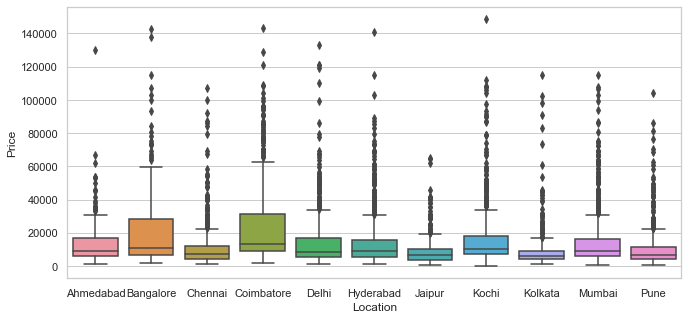

In [97]:
plt.figure(figsize=(11, 5))
sns.boxplot(x = "Location", y= "Price", data=region)
plt.show()

#### 판매된 차량의 비율 / General 한 종류의 차가 많이 판매됨

In [98]:
df["Sorts_of_cars"].value_counts()

General    5163
SUV         874
Sedan       101
Luxury       15
Name: Sorts_of_cars, dtype: int64

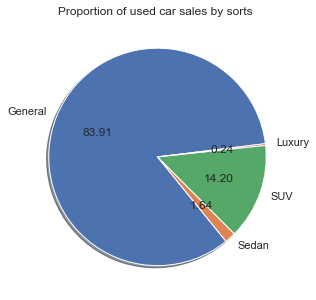

In [99]:
labels = ["General", "Sedan","SUV", "Luxury"]
sizes = [5163, 101, 874 ,15]
explode = [0, 0, 0, 0]

plt.figure(figsize=(11, 5))
plt.title("Proportion of used car sales by sorts ")
plt.pie(sizes, explode= explode ,labels = labels, autopct = "%.2f", shadow = True, 
       startangle =7)
plt.show()

#### 시장에서 많이 팔린 브랜드의 비율

In [100]:
df.Name.value_counts()

Maruti           1240
Hyundai          1121
Honda             618
Toyota            421
Mercedes-Benz     325
Volkswagen        321
Ford              302
Mahindra          281
BMW               267
Audi              240
Tata              195
Skoda             182
Renault           151
Chevrolet         121
Nissan             95
Land               56
Jaguar             42
Mitsubishi         34
Mini               29
Fiat               28
Volvo              21
Jeep               19
Porsche            18
Datsun             17
ISUZU               3
Force               3
Smart               1
Ambassador          1
Bentley             1
Name: Name, dtype: int64

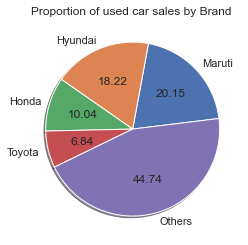

In [101]:
labels = ["Maruti", "Hyundai","Honda", "Toyota", "Others"]
sizes = [1240, 1121, 618 ,421, 2753]
explode = [0, 0, 0, 0,0]

plt.title("Proportion of used car sales by Brand ")
plt.pie(sizes, explode= explode ,labels = labels, autopct = "%.2f", shadow = True, 
       startangle =7)
plt.show()

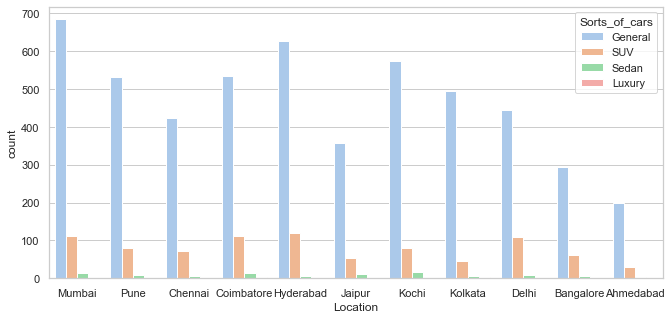

In [102]:
plt.figure(figsize=(11, 5))
sns.countplot(data=df, x='Location', hue='Sorts_of_cars', palette='pastel')
plt.show()

#### 차량 모델의 연식에 따라 price가 올라가는 모습을 보임

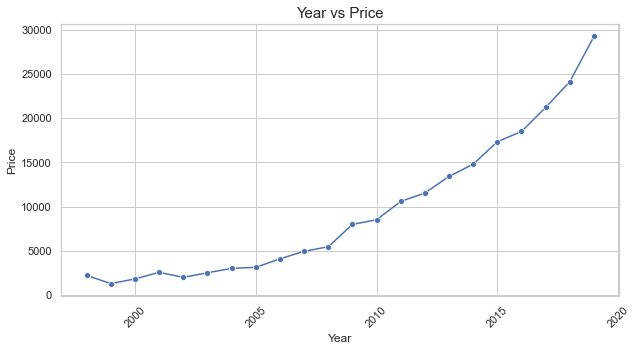

In [103]:
# 그림 설정
plt.figure(figsize=(10, 5))

# 그래프 그리기
sns.lineplot(data=df.groupby('Year')['Price'].mean(), marker='o', color='b')

# 제목 및 축 레이블 추가
plt.title('Year vs Price', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Price')

# x축 눈금 라벨 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

#### 상관관계 그래프 그리기

<AxesSubplot:>

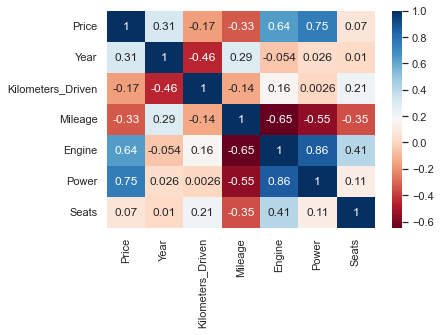

In [104]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'RdBu')

- Power과 Price간의 상관관계 검정

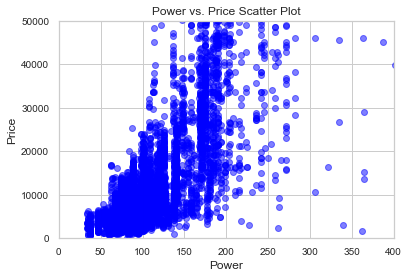

In [105]:
# 산점도 그리기
plt.scatter(df["Power"], df["Price"], alpha=0.5, color='blue')  # alpha는 투명도 조절

# 제목 및 축 레이블 추가
plt.title('Power vs. Price Scatter Plot')
plt.xlabel('Power')
plt.ylabel('Price')

# 축 범위 설정
plt.xlim(0, 400)  # x축 범위
plt.ylim(0, 50000)  # y축 범위

# 축 눈금 설정
plt.xticks(fontsize=10)  # x축 눈금 크기 설정
plt.yticks(fontsize=10)  # y축 눈금 크기 설정

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

In [106]:
## 상관관계 검정

corr, pval = stats.pearsonr(df["Engine"], df["Price"])
print("Correlation Analysis")
print('corr: {0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

# Engine과 가격간에 유의한 상관관계가 있다.

Correlation Analysis
corr: 0.638
p-value:0.000


Text(0.5, 1.0, 'Engine vs. Price Scatter Plot')

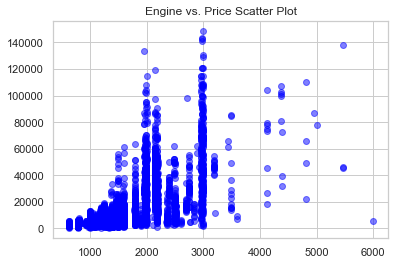

In [107]:
# 산점도 그리기
plt.scatter(df["Engine"], df["Price"], alpha=0.5, color='blue')  # alpha는 투명도 조절

# 제목 및 축 레이블 추가
plt.title('Engine vs. Price Scatter Plot')

- Owner_Type과 price 간의 상관관계 검정

In [108]:
First= df[df["Owner_Type"]== "First"]
Second= df[df["Owner_Type"]== "Second"]
Third=df[df["Owner_Type"]== "Third"]
FA=df[df["Owner_Type"]== "Fourth & Above"]
Third_more = pd.concat([Third, FA], axis=0) 

In [109]:
# 정규성 검정
statistic, p =stats.shapiro(First["Price"])
print("First 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Second["Price"])
print("Second 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))
statistic, p =stats.shapiro(Third_more["Price"])
print("Third 통계량 = {:.0}, P값 = {:.1}".format(statistic,p))

First 통계량 = 0.7, P값 = 0e+00
Second 통계량 = 0.6, P값 = 5e-41
Third 통계량 = 0.5, P값 = 2e-17


In [112]:
loc_list = shapiro_function(df, 'Owner_Type')

Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6593332886695862
p-value: 0.0
First
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.8959252238273621
p-value: 0.2653948664665222
Fourth & Above
p-value가 유의수준보다 크므로 데이터가 정규 분포를 따를 가능성이 있습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.6371350288391113
p-value: 4.573557927863338e-41
Second
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************
Shapiro-Wilk 검정 결과:
통계량(statistic): 0.5500732660293579
p-value: 8.687688714720298e-17
Third
p-value가 유의수준보다 작으므로 데이터가 정규 분포를 따르지 않습니다.
****************************************************************************************************


In [113]:
kruskal_function(df, 'Owner_Type', loc_list)

Kruskal-Wallis Test 결과:
검정 통계량: 245.27441599834245
p-value: 6.8843575901742025e-53
p-value가 유의수준보다 작으므로 집단 간의 평균 차이가 통계적으로 유의미합니다.

다수의 그룹 간에 평균 차이가 있는 것으로 나타났으므로 사후 검정을 수행합니다.
                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
       group1               group2          meandiff  p-adj     lower      upper    reject
------------------------------------------------------------------------------------------
         First_group Fourth & Above_group -10410.1813  0.312 -25941.1513  5120.7886  False
         First_group         Second_group  -3830.2149    0.0  -5368.5959 -2291.8339   True
         First_group          Third_group  -9620.9503    0.0 -13851.2387 -5390.6619   True
Fourth & Above_group         Second_group   6579.9664 0.6987   -9002.616 22162.5489  False
Fourth & Above_group          Third_group     789.231 0.9993 -15283.9019 16862.3639  False
        Second_group          Third_group  -5790.7354 0.0042 -10206.7504 -1374.7205   True
----

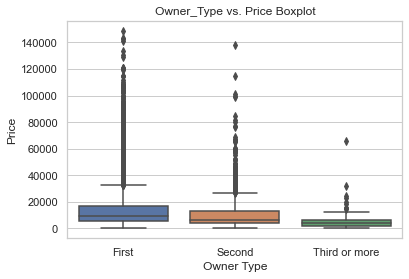

In [114]:
data = [First["Price"], Second["Price"], Third_more["Price"]]
labels = ["First", "Second", "Third or more"]

# 상자 그림 그리기
sns.boxplot(data=data)

# 제목 및 축 레이블 추가
plt.title('Owner_Type vs. Price Boxplot')
plt.xlabel('Owner Type')
plt.ylabel('Price')

# x축에 그룹 이름 추가
plt.xticks(range(len(labels)), labels)

# 그래프 표시
plt.show()